# Logistic Regression

Logistic regression is a statistical method for predicting binary outcomes from data.

Examples of this are "yes" vs. "no" or "young" vs. "old". 

These are categories that translate to a probability of being a 0 or a 1 

We can calculate the logistic regression by applying an activation function as the final step to our linear model. 
It is a special case of linear regression as it predicts the probabilities of outcome using log function. We use the activation function (sigmoid) to convert the outcome into categorical value.

This converts the linear regression output to a probability.

In [63]:
# Dummy Classifier
# Logistic regression Classifier
# Random Forests Classifier
# ExtraTreesClassifier
# Adoptive Boosting classfier
# K Neighbors Classifier
# Support Vector Classifier
# Decision Tree Classifier

In [64]:
# Add dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()  #  Will import Seaborn functionalities

import warnings
warnings.filterwarnings('ignore')

# Data Understanding EDA

In [65]:
df =pd.read_csv('Resources/diabetes.csv')
df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [66]:
type(df)

pandas.core.frame.DataFrame

In [67]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [69]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [70]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [71]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [72]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [73]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [74]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [75]:
df['Outcome'].value_counts(normalize=True)


0    0.651042
1    0.348958
Name: Outcome, dtype: float64

# Data Visualization

<AxesSubplot:>

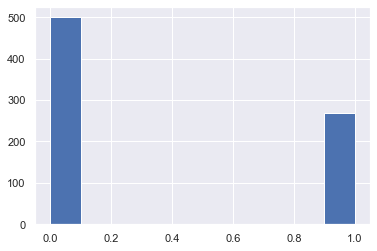

In [76]:
df['Outcome'].hist()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

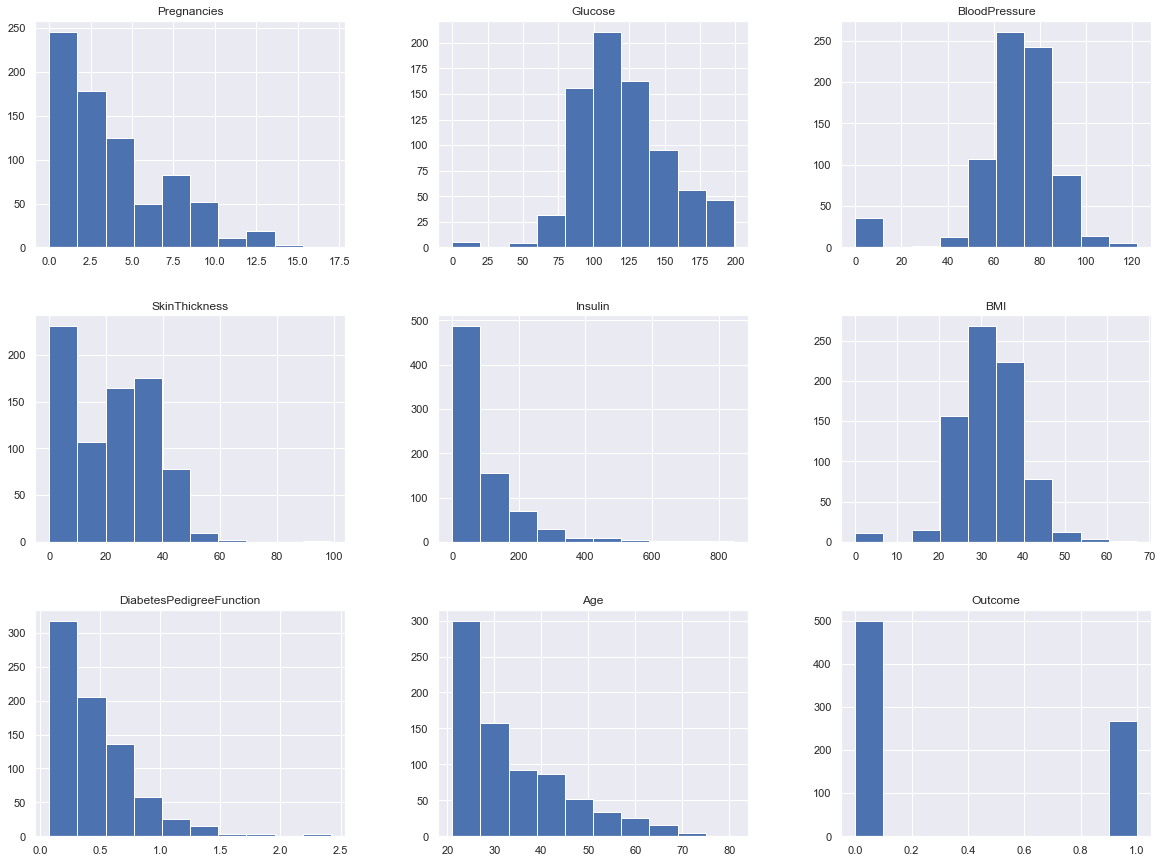

In [77]:
df.hist(figsize=(20,15))

<AxesSubplot:xlabel='BMI', ylabel='Density'>

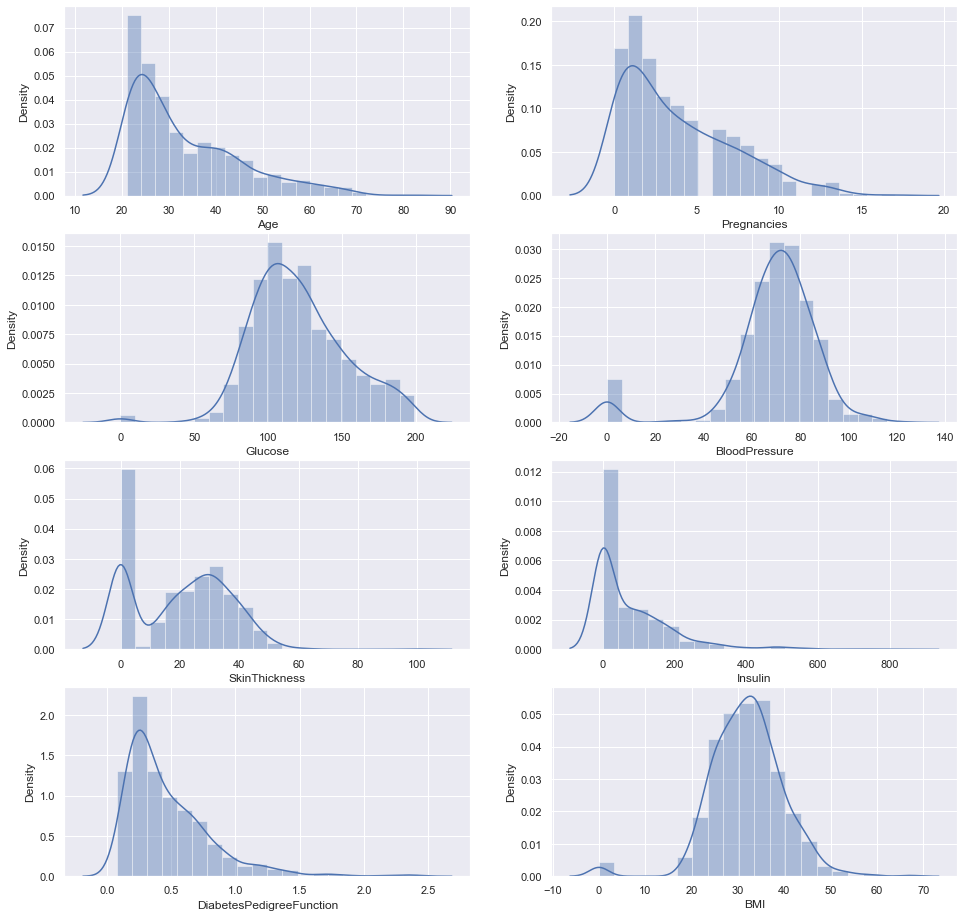

In [78]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

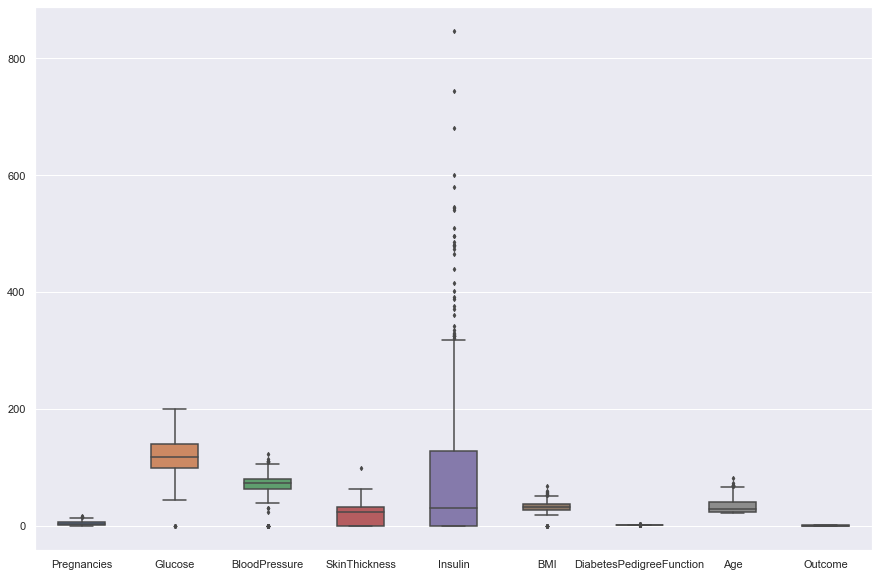

In [79]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = df, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [80]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# These variables are Glucose. As these increase, Outcome variable increases.

In [81]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


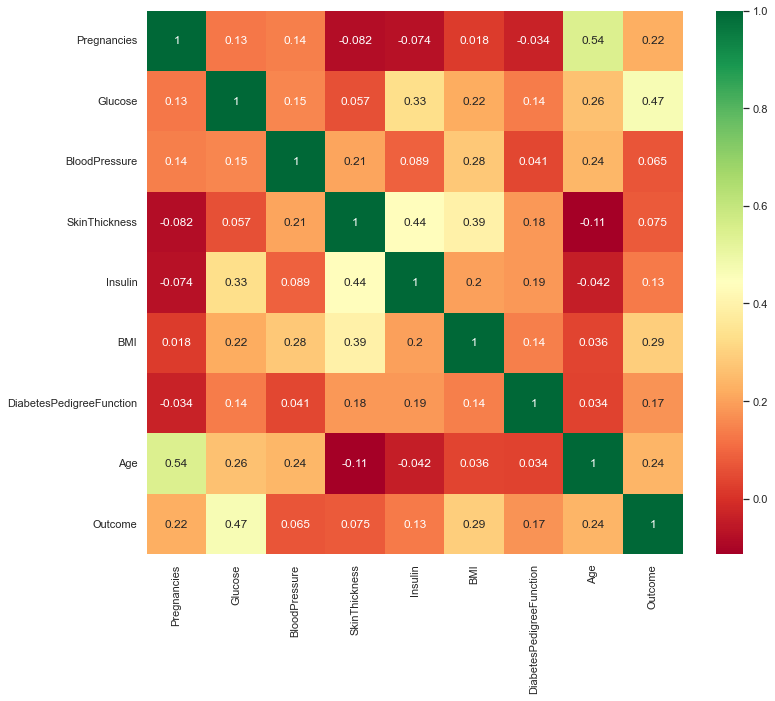

In [82]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

# Data Preprocessing

## Missing Values

Impute the missing values "mean" for numerical columns
and for categorical columns with its "mode"

In [83]:
# replace 0 with NAN
import numpy as np
df_copy = df.copy()
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [84]:
df_copy['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [85]:
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [86]:
#pip install missingno

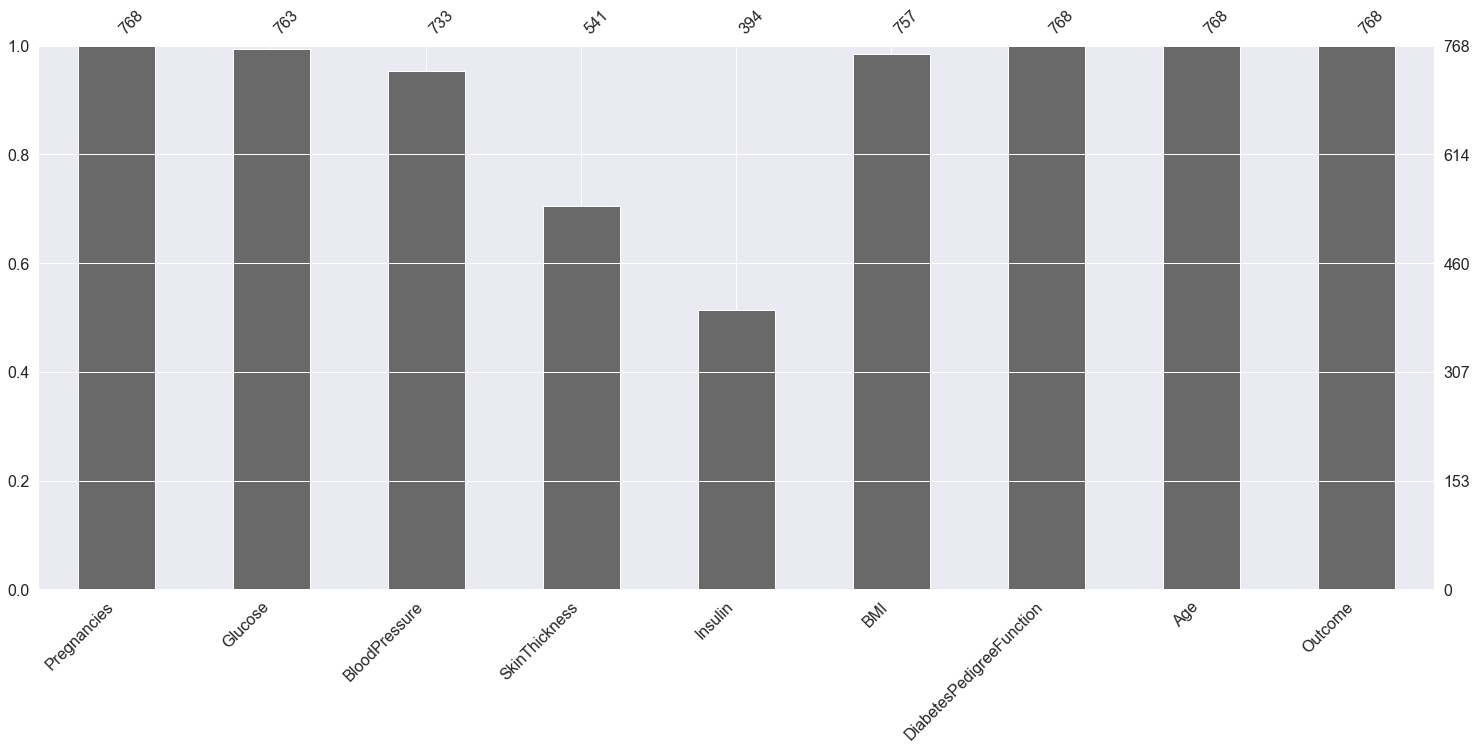

In [87]:
import missingno as msno
msno.bar(df_copy);

In [88]:
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(), inplace=True)
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace=True)

In [89]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


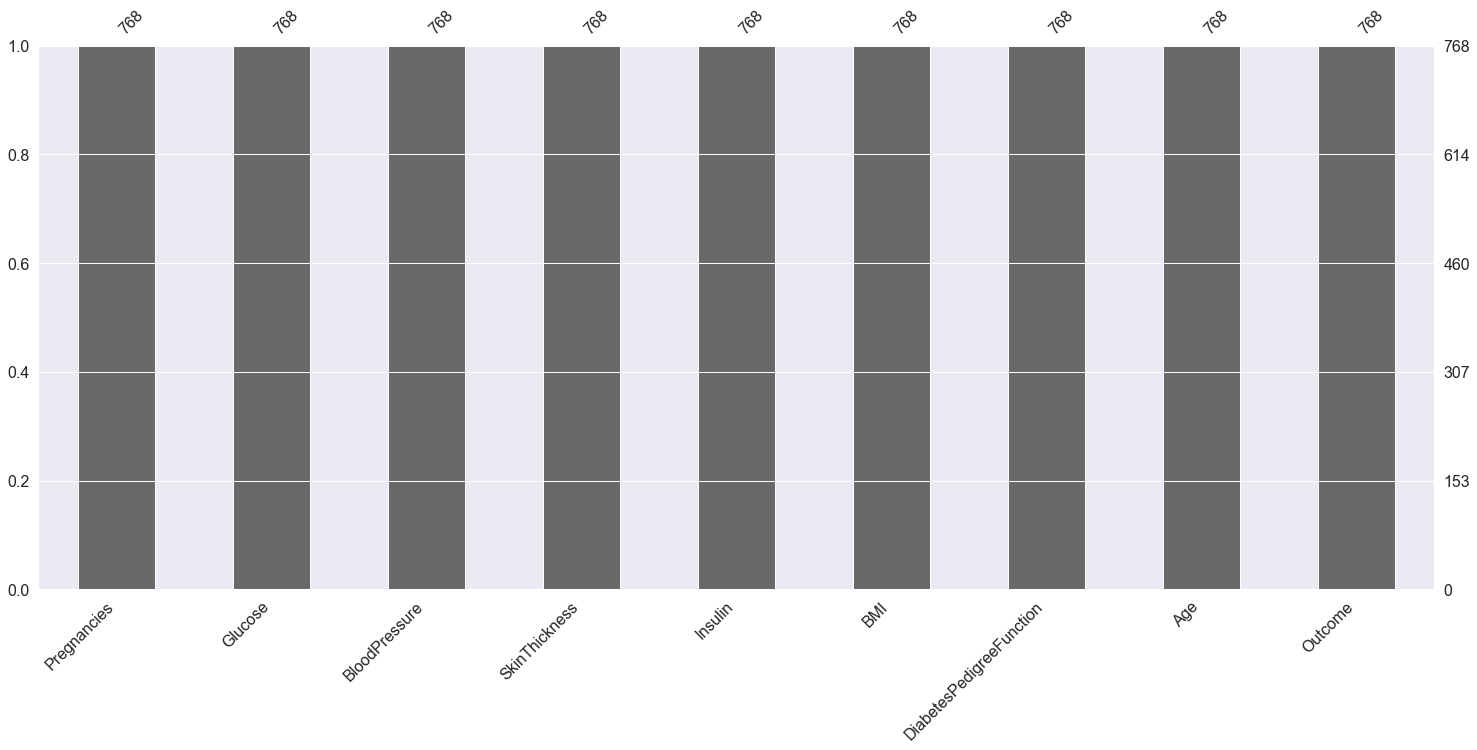

In [90]:
msno.bar(df_copy);

In [91]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='BMI', ylabel='Density'>

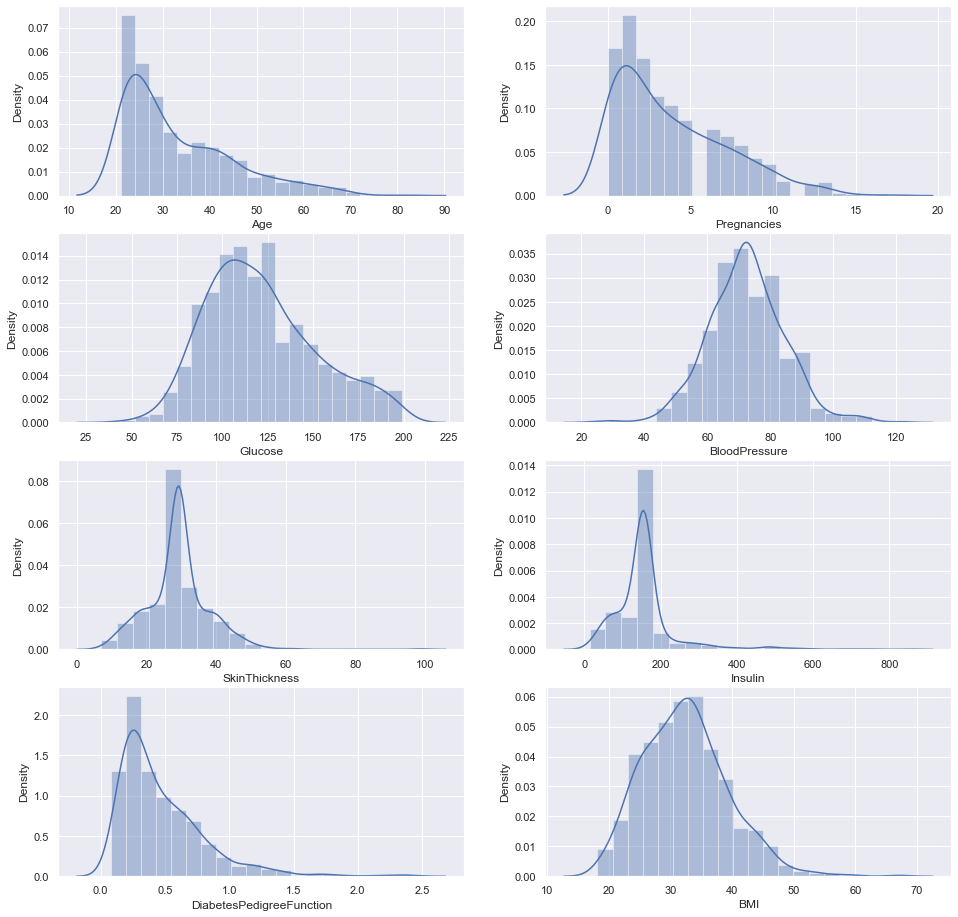

In [92]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df_copy.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df_copy.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df_copy.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df_copy.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df_copy.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df_copy.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df_copy.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df_copy.BMI, bins = 20, ax=ax[3,1]) 

## Outliers

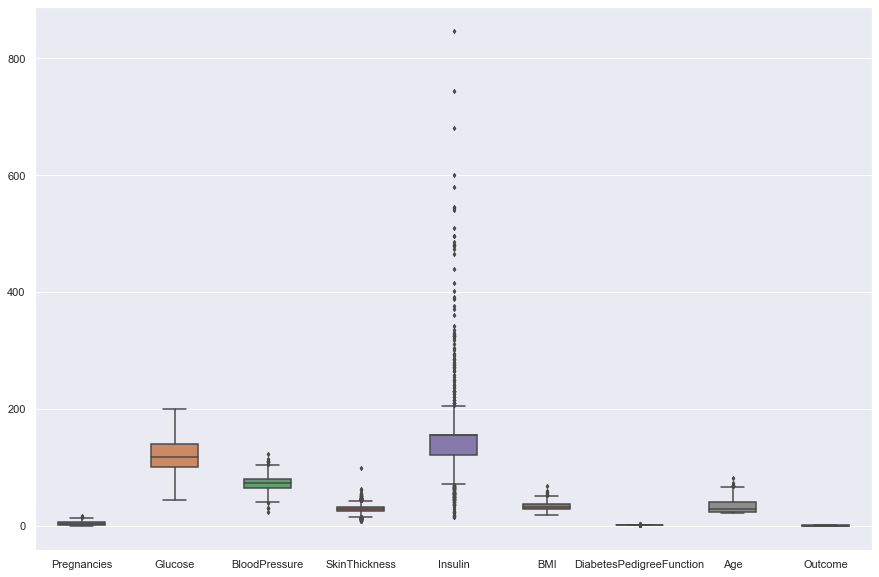

In [93]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = df_copy, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [94]:
outLier_df= df_copy.copy()
Q1 = outLier_df.Insulin.quantile(0.25)
Q3 = outLier_df.Insulin.quantile(0.75)
IQR = Q3-Q1
print(round(IQR,2))


34.05


In [95]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(round(lower,2))
print(round(upper,2))

70.43
206.62


In [96]:

outLier_df= outLier_df[~((outLier_df['Insulin']< lower) |(outLier_df['Insulin']> upper))]

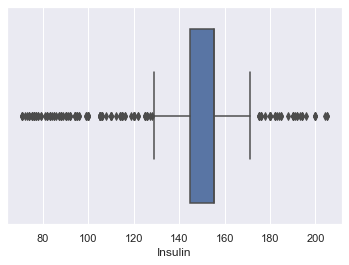

In [97]:
import seaborn as sns
sns.boxplot(x = outLier_df["Insulin"]);

# Machine Learning Models

<!-- 1 - Need to identify X and y/
2 - Split our data using the Train-Test-Split Method (80% vs 20%)
3 - Import the model (library)
4 - Initiate the model engine - by simply calling the model/function
5 - Train the model on the 80% (X and y) using fit() method
6 - Test the model on the 20% (X only) using the predict() method
7 - We compare the Predicted outcome with the Actual outcome
8 - We make the decision -->

# X, y 

In [98]:
# Drop the diabetes values and set the X to the remaining data.
X = df_copy.drop("Outcome", axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [99]:
X.shape

(768, 8)

In [100]:
# Set the y variable to the "Outcome" column.
y = df_copy["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [101]:
y.shape

(768,)

In [102]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Split our data into training and testing data

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Dummy Classifier

In [105]:
from sklearn.dummy import DummyClassifier

dummy_frequent_clf = DummyClassifier(strategy="most_frequent")

dummy_frequent_clf.fit(X_test, y_test)

DummyClassifier(strategy='most_frequent')

In [108]:
y_pred =dummy_frequent_clf.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [109]:
score_train = dummy_frequent_clf.score(X_train, y_train)
score_test = dummy_frequent_clf.score(X_test, y_test)
print('The training fraction of correct classifications is: {:5.3f}'.format(score_train))
print('The testing fraction of correct classifications is: {:5.3f}'.format(score_test))


The training fraction of correct classifications is: 0.655
The testing fraction of correct classifications is: 0.641


# Confusion Matrix

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [111]:
CM = confusion_matrix(y_test,y_pred)
CM

array([[123,   0],
       [ 69,   0]], dtype=int64)

In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       123
           1       0.00      0.00      0.00        69

    accuracy                           0.64       192
   macro avg       0.32      0.50      0.39       192
weighted avg       0.41      0.64      0.50       192



## Feature scaling

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
# Let's summarize the steps we took to use a logistic regression model:

# Create a model with LogisticRegression().
# Train the model with model.fit().
# Make predictions with model.predict().

The first line of code uses the predict() method to create predictions based on X_test.
The second line creates a DataFrame of predicted values and actual values.

# Validate the model with accuracy_score().
we validate the model, or evaluate its performance. You can create a model 
and use it to make predictions, but you won't know how good the model is unless you assess its performance:

SyntaxError: invalid syntax (33164066.py, line 7)

## Logistic Regression

In [115]:
# Import the model
from sklearn.linear_model import LogisticRegression
# Instantiate a logistic regression model
classifier = LogisticRegression()
# Train the Model we use fit () 
classifier.fit(X_train_scaled, y_train)
# validate the model we use predict()
y_pred = classifier.predict(X_test_scaled)

##  predicted values Vs actual values

In [128]:
# we validate the model, or evaluate its performance by using accuracy score. 
values = pd.DataFrame({"Prediction": y_pred, "Actual": y_test})
print(values.head(30))
print(accuracy_score( y_pred,y_test))

     Prediction  Actual
668           0       0
324           0       0
624           0       0
690           0       0
473           0       0
204           0       0
97            0       0
336           0       0
568           1       0
148           1       0
667           0       1
212           1       0
199           0       1
265           0       0
760           0       0
356           0       1
501           0       0
457           0       0
604           1       1
213           1       1
636           0       0
544           0       0
86            1       0
208           0       0
281           1       0
209           1       1
581           0       0
639           0       0
328           0       1
431           0       0
0.7291666666666666


In [127]:
lr_CM = confusion_matrix(y_test,y_pred)
lr_CM

array([[99, 24],
       [28, 41]], dtype=int64)

In [103]:
target_names = ["negative", "positive"]

In [131]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.78      0.80      0.79       123
    positive       0.63      0.59      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



In [117]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7847222222222222
Testing Data Score: 0.7291666666666666


## Random Forests

In [67]:
# Import a Random Forests classifier
from sklearn.ensemble import RandomForestClassifie
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

    negative       0.82      0.79      0.80       123
    positive       0.64      0.68      0.66        69

    accuracy                           0.75       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.75      0.75       192

Training Score: 1.0
Testing Score: 0.75


In [81]:
confusion_matrix(y_test, y_pred)

array([[100,  23],
       [ 29,  40]], dtype=int64)

## ExtraTreesClassifier

In [68]:
# Import an Extremely Random Trees classifier
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=1)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

    negative       0.79      0.80      0.79       123
    positive       0.63      0.62      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192

Training Score: 1.0
Testing Score: 0.734375


## Adoptive Boosting classfier

In [70]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

    negative       0.79      0.80      0.79       123
    positive       0.63      0.62      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192

Training Score: 0.84375
Testing Score: 0.71875


## K Neighbors Classifier (KNN)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7847222222222222
Testing Data Score: 0.7291666666666666


## Support Vector Classifier

In [132]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.7760416666666666
Test Accuracy of SVC Model is 0.7291666666666666


In [133]:
confusion_matrix(y_test, y_pred)

array([[106,  17],
       [ 35,  34]], dtype=int64)

In [134]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.75      0.86      0.80       123
    positive       0.67      0.49      0.57        69

    accuracy                           0.73       192
   macro avg       0.71      0.68      0.68       192
weighted avg       0.72      0.73      0.72       192



## Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.6822916666666666


In [76]:
confusion_matrix(y_test, y_pred)

array([[84, 39],
       [22, 47]], dtype=int64)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       123
           1       0.55      0.68      0.61        69

    accuracy                           0.68       192
   macro avg       0.67      0.68      0.67       192
weighted avg       0.70      0.68      0.69       192



In [83]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boosting', 'SGB', 'XgBoost', 'Stacking', 'Cat Boost']
scores = [score,knn_test_acc, svc_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_test_acc, sgbc_test_acc, xgb_test_acc]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

NameError: name 'knn_test_acc' is not defined

# confusion_matrix

In [78]:
# from sklearn.metrics import confusion_matrix, classification_report

# y_true = y_test
# y_pred = classifier.predict(X_test)
# confusion_matrix(y_true, y_pred)

array([[100,  23],
       [ 29,  40]], dtype=int64)

In [79]:
# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# accuracy = (tp + tn) / (tp + fp + tn + fn) 
# print(f"Accuracy: {accuracy}")

Accuracy: 0.7291666666666666
